In [37]:
import pandas as pd
import saspy
sas_session = saspy.SASsession()

Using SAS Config named: oda
SAS Connection established. Subprocess id is 4993



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /opt/anaconda3/lib/python3.9/site-packages/saspy/sascfg_personal.py
WORK Path             = /saswork/SAS_workC9500001DBC7_odaws01-usw2-2.oda.sas.com/SAS_work17AE0001DBC7_odaws01-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M7P08062020
SASPy Version         = 5.2.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 121799


In [47]:
#     # read in the SAS macro from .txt file
with open('/Users/davydsadovskyy/react_udemy/portfolio2/flask_backend/macro.txt', 'r') as f:
    lines = f.readlines()
    macro = ''.join(lines)

In [48]:
gpt_macro_submit = sas_session.submit("""                 
%s
""" % format(macro))

In [49]:
gpt_plot_data_df = sas_session.sasdata2dataframe(table='y_values', libref='work')

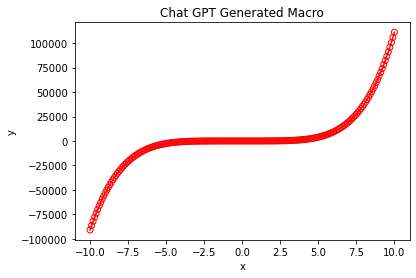

In [50]:
import matplotlib.pyplot as plt

# Assuming you have the x and y values from the SAS-generated graph
x = gpt_plot_data_df.x
y = gpt_plot_data_df.y

# Create the scatter plot
plt.scatter(x, y, color='red', marker='o', facecolors='none')

# Create the line plot
plt.plot(x, y, color='red')

# Set plot labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Chat GPT Generated Macro')

# Save the plot as an image file
plt.savefig('gpt_graph.png', dpi=300)

# Show the plot
plt.show()